# **Customer Segmentation**
**Problem Statement:** XYZ bank wants to roll out Christmas offers to their customers. But Bank does not want to roll out same offer to all customers  instead they want to roll out personalized offer to particular set of customers. If they manually start understanding the category of customer then this will be not efficient and also they will not be able to uncover the hidden pattern in the data ( pattern which group certain kind of customer in one category). Bank approached ABC analytics company to solve their problem. Bank also shared information with ABC analytics that they don't want more than 5 group as this will be inefficient for their campaign.

**ML Problem:** ABC analytics proposed customer segmentation approach to Bank.

ABC analytics assigned this talk to their analytics team and instructed their team to come up with the approach and feature which group similar behavior customer in one category and others in different category



In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data=pd.read_csv('custt_seg.csv',sep=',',index_col=False,dtype='unicode')

**Week 8: Data understanding(number of NA values, outliers , skewed etc)**

*   changing some column names
*   fixing incorret data types
*   outliers detection and treatment

In [9]:
data

,Unnamed: 0,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0,28.01.2015,1375586,N,ES,H,35,12.01.2015,0,6,...,0,0,0,0,0,0,0,0,0,0
1,1,28.01.2015,1050611,N,ES,V,23,10.08.2012,0,35,...,0,0,0,0,0,0,0,0,0,0
2,2,28.01.2015,1050612,N,ES,V,23,10.08.2012,0,35,...,0,0,0,0,0,0,0,0,0,0
3,3,28.01.2015,1050613,N,ES,H,22,10.08.2012,0,35,...,0,0,0,0,0,0,0,0,0,0
4,4,28.01.2015,1050614,N,ES,V,23,10.08.2012,0,35,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,28.02.2015,1183296,N,ES,H,27,25.09.2013,0,22,...,0,0,0,0,0,0,0,0,0,1
999996,999996,28.02.2015,1183295,N,ES,H,56,25.09.2013,0,22,...,0,0,0,0,0,0,0,0,0,0
999997,999997,28.02.2015,1183294,N,ES,V,39,25.09.2013,0,22,...,0,0,0,0,0,0,0,0,0,1
999998,999998,28.02.2015,1183293,N,ES,V,36,25.09.2013,0,22,...,0,0,0,0,0,0,0,0,0,1


In [10]:
data.shape

(1000000, 48)

In [11]:
data.drop('ult_fec_cli_1t',axis=1, inplace=True)
data.drop('conyuemp',axis=1, inplace=True)
data.drop('ind_aval_fin_ult1',axis=1, inplace=True)

In [12]:
#changing some column name
data.rename({'ncodpers':'cust_code', 'ind_empleado':'employee_index', 'fecha_alta': 'date_regist'}, axis=1, inplace=True)
data.rename({'Unnamed: 0':'ıd','pais_residencia':'custom_country_residence', 'ind_nuevo':'new_cust_ındex', 'antiguedad':'cust_seniority'}, axis=1, inplace=True)
data.rename({'indrel':'primary_cust', 'ult_fec_cli_1t':'last_data_primary_cust', 'indrel_1mes': 'cust_type'}, axis=1, inplace=True)
data.rename({'tiprel_1mes':'cust_relation_type', 'indresi':'residence_index', 'indext': 'foreigner_index'}, axis=1, inplace=True)
data.rename({'conyuemp':'spouse_index', 'canal_entrada':'channel', 'indfall':'deceased_index','tipodom':'addres_type'}, axis=1, inplace=True)
data.rename({'nomprov':'province_name', 'ind_actividad_cliente':'activity_index', 'renta': 'gross_income','ind_ahor_fin_ult1':'save_account'}, axis=1, inplace=True)
data.rename({'ind_cco_fin_ult1':'current_account', 'ind_cder_fin_ult1':'derivada_account', 'ind_cno_fin_ult1':'payroll_account','ind_ctju_fin_ult1':'junior_account'}, axis=1, inplace=True)
data.rename({'ind_ctma_fin_ult1':'mas_particu_account', 'ind_ctop_fin_ult1':'particu_account','ind_ctpp_fin_ult1':'particu_plus_account'}, axis=1, inplace=True)
data.rename({'ind_deco_fin_ult1':'short_term_deposit', 'ind_deme_fin_ult1':'medium_term_deposit', 'ind_dela_fin_ult1':'long_term_deposit','ind_ecue_fin_ult1':'e_account'}, axis=1, inplace=True)
data.rename({'ind_fond_fin_ult1':'funds', 'ind_hip_fin_ult1':'mortgage', 'ind_plan_fin_ult1':'pensions','ind_pres_fin_ult1':'loans'}, axis=1, inplace=True)
data.rename({'ind_reca_fin_ult1':'taxes', 'ind_tjcr_fin_ult1':'credit_card', 'ind_valo_fin_ult1':'securities','ind_viv_fin_ult1':'home_account'}, axis=1, inplace=True)
data.rename({'ind_nomina_ult1':'payroll', 'ind_nom_pens_ult1':'a_pension', 'ind_recibo_ult1':'direct_debit'}, axis=1, inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 45 columns):
 #   Column                    Non-Null Count    Dtype 
---  ------                    --------------    ----- 
 0   ıd                        1000000 non-null  object
 1   fecha_dato                1000000 non-null  object
 2   cust_code                 1000000 non-null  object
 3   employee_index            989218 non-null   object
 4   custom_country_residence  989218 non-null   object
 5   sexo                      989214 non-null   object
 6   age                       989218 non-null   object
 7   date_regist               989218 non-null   object
 8   new_cust_ındex            989218 non-null   object
 9   cust_seniority            989218 non-null   object
 10  primary_cust              989218 non-null   object
 11  cust_type                 989218 non-null   object
 12  cust_relation_type        989218 non-null   object
 13  residence_index           989218 non-null  

In [14]:
data['residence_index']=data['residence_index'].replace('S','Yes').replace('N','No')
data['residence_index'].value_counts()

,count
residence_index,
Yes,982264
No,6954


In [15]:
data['fecha_dato']=pd.to_datetime(data['fecha_dato'],unit='ns')
data['date_regist']=pd.to_datetime(data['fecha_dato'],unit='ns')

In [16]:
#Employee index: A active, B ex employed, F filial, N not employee, P pasive
print(data['employee_index'].value_counts())
print(data['employee_index'].isnull().sum())

employee_index
N    988260
B       387
A       287
F       282
S         2
Name: count, dtype: int64
10782


In [17]:
print(data['new_cust_ındex'].value_counts())
print(data['new_cust_ındex'].isnull().sum())

new_cust_ındex
0    988734
1       484
Name: count, dtype: int64
10782


In [18]:
#1(First/Primary), 99 (Primary customer during the month but not at the end of the month)
data['primary_cust'].value_counts()

,count
primary_cust,
1,988117
99,1101


In [19]:
data['cust_type'].value_counts()

,count
cust_type,
1,989175
3,41
2,2


In [20]:
print(data['cust_code'].isnull().sum())

0


In [21]:
#Customer relation type at the beginning of the month, A (active), I (inactive), P (former customer),R (Potential)
print(data['cust_relation_type'].value_counts())
print(data['cust_relation_type'].isnull().sum())

cust_relation_type
A    547800
I    441377
P        41
Name: count, dtype: int64
10782


In [22]:
data['foreigner_index']=data['foreigner_index'].replace('S','Yes').replace('N','No')
print(data['foreigner_index'].value_counts())
print(data['foreigner_index'].isnull().sum())

foreigner_index
No     946328
Yes     42890
Name: count, dtype: int64
10782


In [23]:
print(data['deceased_index'].value_counts())
print(data['deceased_index'].isnull().sum())

deceased_index
N    986107
S      3111
Name: count, dtype: int64
10782


In [24]:
print(data['channel'].value_counts())
print(data['channel'].isnull().sum())

channel
KAT    313944
KFC    259035
KHE    249254
KFA     37733
KAS      8190
        ...  
KDI         2
KDB         2
KBN         2
KGN         1
KGC         1
Name: count, Length: 156, dtype: int64
10861


In [25]:
print(data['addres_type'].value_counts())
print(data['addres_type'].isnull().sum())
data['addres_type']

addres_type
1    989218
Name: count, dtype: int64
10782


,addres_type
0,1
1,1
2,1
3,1
4,1
...,...
999995,1
999996,1
999997,1
999998,1


In [26]:
print(data['custom_country_residence'].value_counts())
print(data['custom_country_residence'].isnull().sum())

custom_country_residence
ES    982264
FR       546
AR       542
DE       487
GB       480
       ...  
TN         2
LB         2
GE         2
BZ         2
AL         1
Name: count, Length: 113, dtype: int64
10782


In [27]:
print(data['activity_index'].value_counts())
print(data['activity_index'].isnull().sum())

activity_index
1    558879
0    430339
Name: count, dtype: int64
10782


In [28]:
print(data['save_account'].value_counts())
print(data['save_account'].isnull().sum())

save_account
0    999823
1       177
Name: count, dtype: int64
0


In [ ]:
print(data['current_account'].value_counts())
print(data['current_account'].isnull().sum())

1    749626
0    250374
Name: current_account, dtype: int64
0


In [29]:
print(data['derivada_account'].value_counts())
print(data['derivada_account'].isnull().sum())

derivada_account
0    999409
1       591
Name: count, dtype: int64
0


In [30]:
print(data['payroll_account'].value_counts())
print(data['payroll_account'].isnull().sum())

payroll_account
0    894704
1    105296
Name: count, dtype: int64
0


In [31]:
print(data['junior_account'].value_counts())
print(data['junior_account'].isnull().sum())

junior_account
0    986377
1     13623
Name: count, dtype: int64
0


In [32]:
print(data['mas_particu_account'].value_counts())
print(data['mas_particu_account'].isnull().sum())

mas_particu_account
0    990106
1      9894
Name: count, dtype: int64
0


In [33]:
print(data['particu_account'].value_counts())
print(data['particu_account'].isnull().sum())

particu_account
0    787514
1    212486
Name: count, dtype: int64
0


In [34]:
print(data['particu_plus_account'].value_counts())
print(data['particu_plus_account'].isnull().sum())

particu_plus_account
0    927921
1     72079
Name: count, dtype: int64
0


In [35]:
print(data['short_term_deposit'].value_counts())
print(data['short_term_deposit'].isnull().sum())

short_term_deposit
0    997842
1      2158
Name: count, dtype: int64
0


In [36]:
print(data['medium_term_deposit'].value_counts())
print(data['medium_term_deposit'].isnull().sum())

medium_term_deposit
0    996850
1      3150
Name: count, dtype: int64
0


In [37]:
print(data['long_term_deposit'].value_counts())
print(data['long_term_deposit'].isnull().sum())

long_term_deposit
0    933119
1     66881
Name: count, dtype: int64
0


In [38]:
print(data['e_account'].value_counts())
print(data['e_account'].isnull().sum())

e_account
0    893733
1    106267
Name: count, dtype: int64
0


In [39]:
print(data['funds'].value_counts())
print(data['funds'].isnull().sum())

funds
0    972818
1     27182
Name: count, dtype: int64
0


In [40]:
print(data['mortgage'].value_counts())
print(data['mortgage'].isnull().sum())

mortgage
0    990018
1      9982
Name: count, dtype: int64
0


In [41]:
print(data['pensions'].value_counts())
print(data['pensions'].isnull().sum())

pensions
0    985447
1     14553
Name: count, dtype: int64
0


In [42]:
print(data['loans'].value_counts())
print(data['loans'].isnull().sum())

loans
0    995339
1      4661
Name: count, dtype: int64
0


In [43]:
print(data['taxes'].value_counts())
print(data['taxes'].isnull().sum())

taxes
0    927419
1     72581
Name: count, dtype: int64
0


In [44]:
print(data['credit_card'].value_counts())
print(data['credit_card'].isnull().sum())

credit_card
0    933916
1     66084
Name: count, dtype: int64
0


In [45]:
print(data['securities'].value_counts())
print(data['securities'].isnull().sum())

securities
0    960622
1     39378
Name: count, dtype: int64
0


In [46]:
print(data['home_account'].value_counts())
print(data['home_account'].isnull().sum())

home_account
0    993558
1      6442
Name: count, dtype: int64
0


In [47]:
print(data['payroll'].value_counts())
print(data['payroll'].isnull().sum())

payroll
0    923356
1     71242
Name: count, dtype: int64
5402


In [48]:
print(data['a_pension'].value_counts())
print(data['a_pension'].isnull().sum())

a_pension
0    915485
1     79113
Name: count, dtype: int64
5402


In [49]:
print(data['direct_debit'].value_counts())
print(data['direct_debit'].isnull().sum())

direct_debit
0    833725
1    166275
Name: count, dtype: int64
0


In [50]:
print(data['sexo'].value_counts())
print(data['sexo'].isnull().sum())

sexo
V    562000
H    427214
Name: count, dtype: int64
10786


In [51]:
print(data['province_name'].value_counts())
print(data['province_name'].isnull().sum())

province_name
MADRID                    360131
BARCELONA                  87372
VALENCIA                   46394
SEVILLA                    43922
CORUA                      27545
MALAGA                     26798
MURCIA                     24782
ZARAGOZA                   24621
ALICANTE                   20323
CADIZ                      20292
ASTURIAS                   18399
PONTEVEDRA                 17482
VALLADOLID                 16657
PALMAS                     15976
BIZKAIA                    15597
GRANADA                    12930
TOLEDO                     12131
BADAJOZ                    11909
CANTABRIA                  11264
SALAMANCA                  10650
CORDOBA                     9829
BALEARS                     8361
CACERES                     8347
HUELVA                      7923
CIUDAD REAL                 7782
ALBACETE                    7294
CASTELLON                   6711
NAVARRA                     6584
BURGOS                      6403
TARRAGONA                   6

In [52]:
print(data['cod_prov'].value_counts())
print(data['cod_prov'].isnull().sum())

cod_prov
28    360131
8      87372
46     46394
41     43922
15     27545
29     26798
30     24782
50     24621
3      20323
11     20292
33     18399
36     17482
47     16657
35     15976
48     15597
18     12930
45     12131
6      11909
39     11264
37     10650
14      9829
7       8361
10      8347
21      7923
13      7782
2       7294
12      6711
31      6584
9       6403
43      6120
26      5992
24      5968
17      5735
20      5708
27      5259
32      5151
38      5080
25      4846
23      4492
19      4327
4       4021
16      3768
34      3224
49      3213
40      2979
1       2878
22      2657
5       2573
44      1397
42      1179
52       764
51       526
Name: count, dtype: int64
17734


In [53]:
data[['cod_prov','province_name']]

,cod_prov,province_name
0,29,MALAGA
1,13,CIUDAD REAL
2,13,CIUDAD REAL
3,50,ZARAGOZA
4,50,ZARAGOZA
...,...,...
999995,28,MADRID
999996,15,CORUA
999997,15,CORUA
999998,28,MADRID


In [ ]:
#g = data.dropna(subset=['province_name']).drop_duplicates('cod_prov').set_index('cod_prov')['province_name']
#data['cod_prov'] = data['cod_prov'].fillna(data['province_name'].map(g))

In [54]:
data['new_cust_ındex']=data['new_cust_ındex'].astype("float")
data['cust_seniority']=data['cust_seniority'].astype("float")
data['age']=data['age'].astype("float")
data['cust_type']=data['cust_type'].astype("float")
data['primary_cust']=data['primary_cust'].astype("float")
data['activity_index']=data['activity_index'].astype("float")
data['gross_income']=data['gross_income'].astype("float")

In [ ]:
data['age'].head(264)

0      35.0
1      23.0
2      23.0
3      22.0
4      23.0
       ... 
259    22.0
260    23.0
261     NaN
262    25.0
263    23.0
Name: age, Length: 264, dtype: float64

In [55]:
data['cust_seniority']=data['cust_seniority'].fillna(data['cust_seniority'].mean())
data['cust_seniority'].head(264)

,cust_seniority
0,6.000000
1,35.000000
2,35.000000
3,35.000000
4,35.000000
...,...
259,35.000000
260,35.000000
261,93.093975
262,35.000000


In [66]:
#  Imputation of missing values

def impute_missing_values(data):

    data['age'] = data['age'].fillna(data['age'].mean())

    data['gross_income'].interpolate(method='linear', limit_direction='backward', inplace=True)

    categorical_columns = [
        'cust_type', 'primary_cust', 'cust_relation_type',
        'residence_index', 'foreigner_index', 'channel',
        'deceased_index', 'addres_type', 'province_name',
        'activity_index', 'payroll', 'a_pension',
        'employee_index', 'custom_country_residence',
        'sexo', 'new_cust_ındex', 'cod_prov'
    ]

    for column in categorical_columns:
        data[column] = data[column].fillna(method='ffill')

    return data

# Interpolate backwardly across the column:
#data['gross_income'].interpolate(method ='linear', limit_direction ='backward', inplace=True)

In [64]:
def convert_columns_to_int64(data, columns):

    for column in columns:
        data[column] = data[column].astype("int64")

    return data

columns_to_convert = [
    'ıd', 'cust_code', 'cust_seniority', 'age', 'cust_type',
    'activity_index', 'gross_income', 'save_account', 'current_account',
    'derivada_account', 'payroll_account', 'junior_account',
    'mas_particu_account', 'particu_account', 'particu_plus_account',
    'short_term_deposit', 'medium_term_deposit', 'long_term_deposit',
    'e_account', 'funds', 'mortgage', 'pensions', 'loans',
    'taxes', 'credit_card', 'securities', 'home_account',
    'payroll', 'a_pension', 'direct_debit'
]

data = convert_columns_to_int64(data, columns_to_convert)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 45 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   ıd                        1000000 non-null  int64         
 1   fecha_dato                1000000 non-null  datetime64[ns]
 2   cust_code                 1000000 non-null  int64         
 3   employee_index            1000000 non-null  object        
 4   custom_country_residence  1000000 non-null  object        
 5   sexo                      1000000 non-null  object        
 6   age                       1000000 non-null  int64         
 7   date_regist               1000000 non-null  datetime64[ns]
 8   new_cust_ındex            1000000 non-null  float64       
 9   cust_seniority            1000000 non-null  int64         
 10  primary_cust              1000000 non-null  float64       
 11  cust_type                 1000000 non-null  int64  

In [67]:
data.isnull().sum()

,0
ıd,0
fecha_dato,0
cust_code,0
employee_index,0
custom_country_residence,0
sexo,0
age,0
date_regist,0
new_cust_ındex,0
cust_seniority,0


In [68]:
data.duplicated().sum()

0

<ipython-input-69-6f2d898bfdcf>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


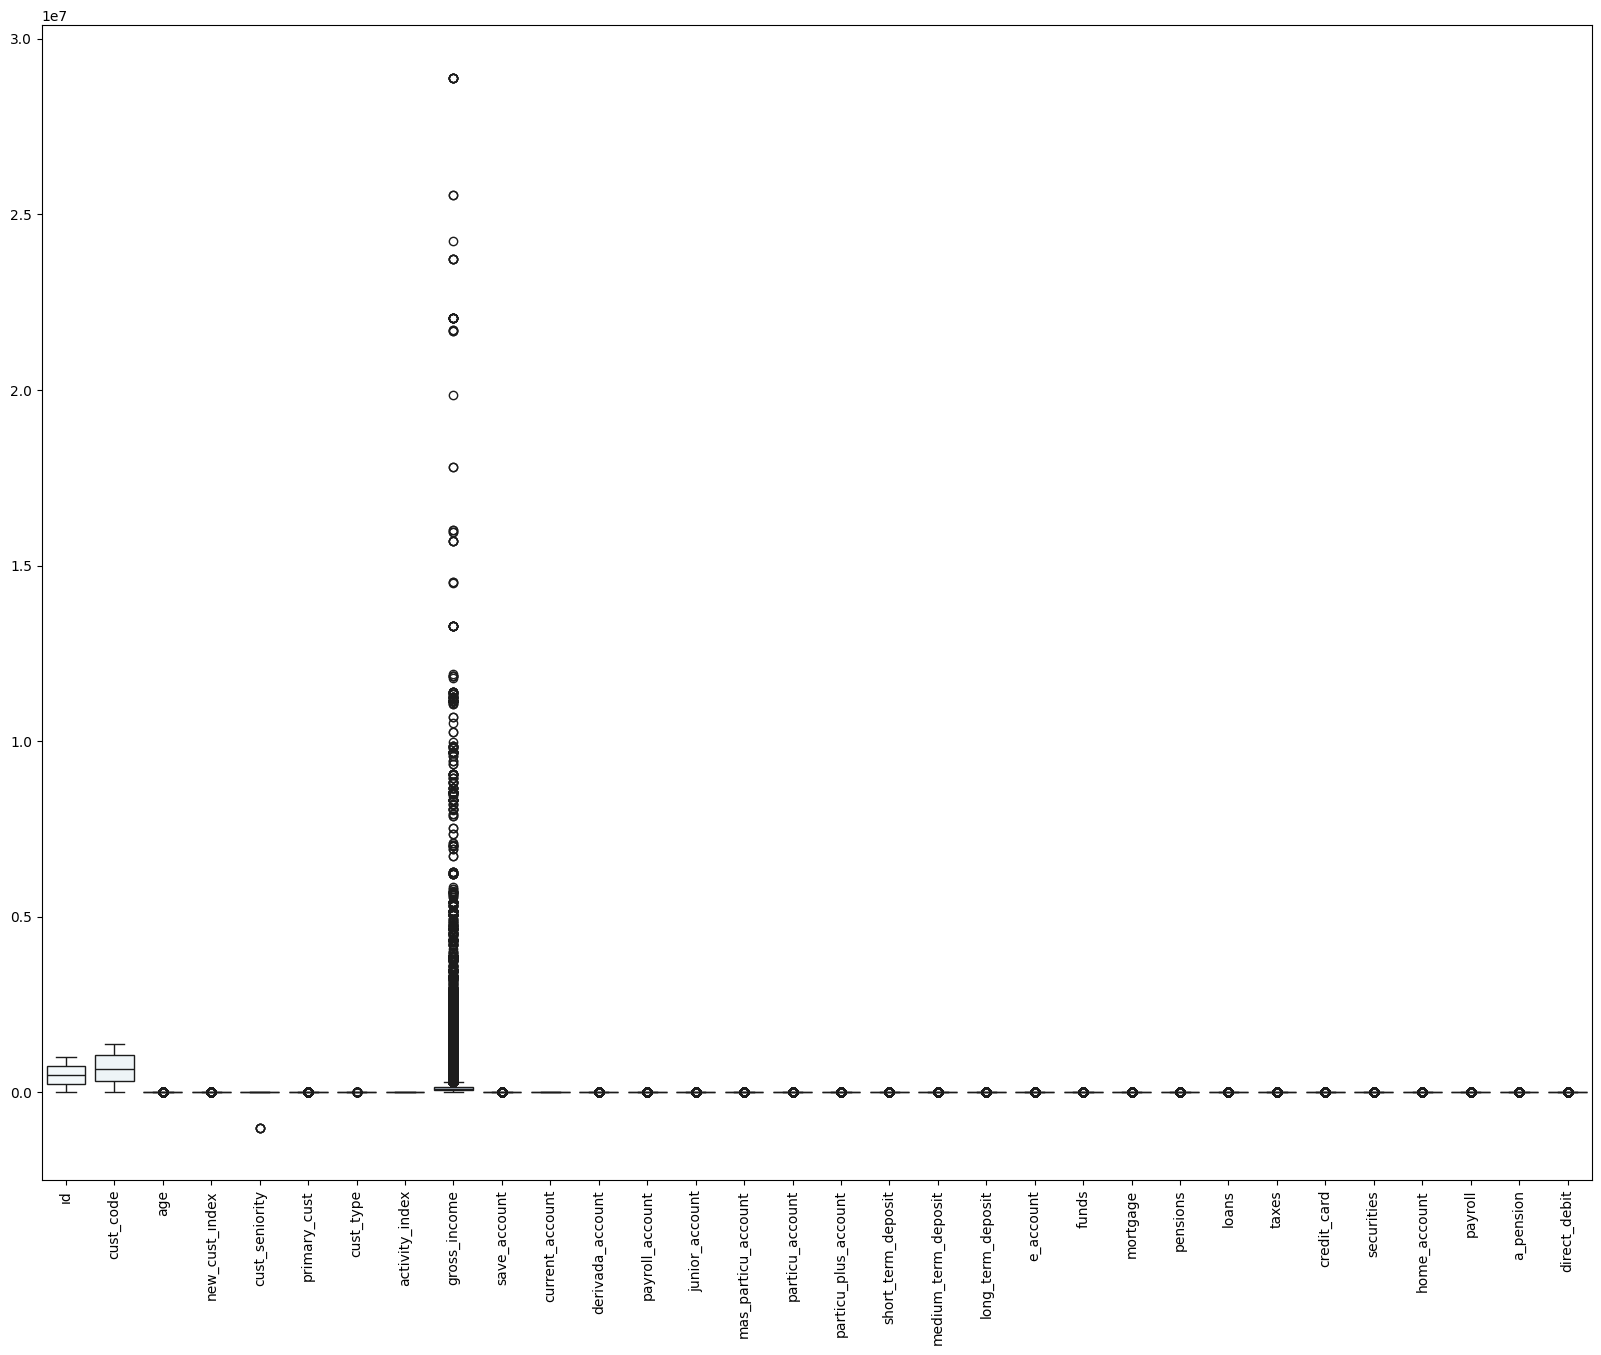

In [69]:
#outliers values
plt.figure(figsize=(20,15))
ax=sns.boxplot(data = data, palette='BuPu')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

plt.show()

In [70]:
numeric_value = data.select_dtypes(exclude="object")
numeric_value.shape

(1000000, 34)

In [71]:
numeric_list=['gross_income']


In [72]:
#detecting outliers
for variables in numeric_list:
   q1= numeric_value[variables].quantile(.25)
   q3 =numeric_value[variables].quantile(.75)
   med=np.median(numeric_value[variables])
   iqr = q3 - q1

   lower_limit = q1 - (1.5 * iqr)
   upper_limit = q3 + (1.5 * iqr)

   outliers=numeric_value.index[(numeric_value[variables]>upper_limit) | (numeric_value[variables]<lower_limit)]

   #outliers suppression
   outliers = (numeric_value[variables] < (lower_limit))
   outliers = (numeric_value[variables] > (upper_limit))

   numeric_value[outliers] = lower_limit
   numeric_value[outliers] = upper_limit

<ipython-input-72-725b7598c394>:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-59429.125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  numeric_value[outliers] = lower_limit
<ipython-input-72-725b7598c394>:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-59429.125' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  numeric_value[outliers] = lower_limit
<ipython-input-72-725b7598c394>:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-59429.125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  numeric_value[outliers] = lower_limit
<ipython-input-72-725b7598c394>:17: FutureWarning: Setting an item of incompati

In [74]:
unique_value = data.nunique()
print("Number of unique values:\n{}".format(unique_value))

Number of unique values:
ıd                          1000000
fecha_dato                        2
cust_code                    626159
employee_index                    5
custom_country_residence        113
sexo                              2
age                             114
date_regist                       2
new_cust_ındex                    2
cust_seniority                  248
primary_cust                      2
cust_type                         3
cust_relation_type                3
residence_index                   2
foreigner_index                   2
channel                         156
deceased_index                    2
addres_type                       1
cod_prov                         52
province_name                    52
activity_index                    2
gross_income                 216084
save_account                      2
current_account                   2
derivada_account                  2
payroll_account                   2
junior_account                    2
mas

In [75]:
print("Unique values in each categorical column:")
for col in data.select_dtypes(include=[object]):
    print(col,":", data[col].unique())

Unique values in each categorical column:
employee_index : ['N' 'A' 'B' 'F' 'S']
custom_country_residence : ['ES' 'CA' 'CH' 'CL' 'IE' 'AT' 'NL' 'FR' 'GB' 'DE' 'DO' 'BE' 'AR' 'VE'
 'US' 'MX' 'BR' 'IT' 'EC' 'PE' 'CO' 'HN' 'FI' 'SE' 'AL' 'PT' 'MZ' 'CN'
 'TW' 'PL' 'IN' 'CR' 'NI' 'HK' 'AD' 'CZ' 'AE' 'MA' 'GR' 'PR' 'RO' 'IL'
 'RU' 'GT' 'GA' 'NO' 'SN' 'MR' 'UA' 'BG' 'PY' 'EE' 'SV' 'ET' 'CM' 'SA'
 'CI' 'QA' 'LU' 'PA' 'BA' 'BO' 'AU' 'BY' 'KE' 'SG' 'HR' 'MD' 'SK' 'TR'
 'AO' 'CU' 'GQ' 'EG' 'ZA' 'DK' 'UY' 'GE' 'TH' 'DZ' 'LB' 'JP' 'NG' 'PK'
 'TN' 'TG' 'KR' 'GH' 'RS' 'VN' 'PH' 'KW' 'NZ' 'MM' 'KH' 'GI' 'SL' 'GN'
 'GW' 'OM' 'CG' 'LV' 'LT' 'ML' 'MK' 'HU' 'IS' 'LY' 'CF' 'GM' 'KZ' 'CD'
 'BZ']
sexo : ['H' 'V']
cust_relation_type : ['A' 'I' 'P']
residence_index : ['Yes' 'No']
foreigner_index : ['No' 'Yes']
channel : ['KHL' 'KHE' 'KHD' 'KFA' 'KFC' 'KAT' 'KAZ' 'RED' 'KHC' 'KHK' 'KGN' 'KHM'
 'KHO' 'KDH' 'KEH' 'KAD' 'KBG' 'KGC' 'KHF' 'KFK' 'KHN' 'KHA' 'KAF' 'KGX'
 'KFD' 'KAG' 'KFG' 'KAB' 'KCC' 'KAE' 'KAH' 'KAR

In [76]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
ıd,1000000.0,499999.5,0.0,249999.75,499999.5,749999.25,999999.0,288675.278933
fecha_dato,1000000,2015-02-08 14:39:35.971200,2015-01-28 00:00:00,2015-01-28 00:00:00,2015-01-28 00:00:00,2015-02-28 00:00:00,2015-02-28 00:00:00,NaN
cust_code,1000000.0,690596.670395,15889.0,336411.0,664476.0,1074511.25,1379131.0,404408.432011
age,1000000.0,43.266717,2.0,27.0,43.0,53.0,116.0,17.065626
date_regist,1000000,2015-02-08 14:39:35.971200,2015-01-28 00:00:00,2015-01-28 00:00:00,2015-01-28 00:00:00,2015-02-28 00:00:00,2015-02-28 00:00:00,NaN
new_cust_ındex,1000000.0,0.000496,0.0,0.0,0.0,0.0,1.0,0.022266
cust_seniority,1000000.0,93.092962,-999999.0,33.0,95.0,156.0,246.0,2001.260509
primary_cust,1000000.0,1.109172,1.0,1.0,1.0,1.0,99.0,3.26909
cust_type,1000000.0,1.000088,1.0,1.0,1.0,1.0,3.0,0.013191
activity_index,1000000.0,0.565418,0.0,0.0,1.0,1.0,1.0,0.495702
